In [1]:
import pandas as pd

In [90]:
import twitter, re, datetime, pandas as pd

class twitterminer():

    request_limit   =   20    
    api             =   False
    data            =   []
    
    twitter_keys = {
        'consumer_key':        'bejMZ1a23iilm782o1ZtlsY80',
        'consumer_secret':     '4whnR4YlZFooqGgiUOxf0BY454Bd9nEbDcfHwRQ6LMxnnS9SdA',
        'access_token_key':    '3314826759-P8IrjCXKEd7w2mKMQ1O3wyDHv3yJXZc2tks0UXl',
        'access_token_secret': 'zIfE0Wesx9ptYlrjmVgkLVG1WrAS5El7I79meC5rsCGLG'
    }
    
    def __init__(self,  request_limit = 20):
        
        self.request_limit = request_limit
        
        # This sets the twitter API object for use internall within the class
        self.set_api()
        
    def set_api(self):
        
        self.api = twitter.Api(
            consumer_key         =   self.twitter_keys['consumer_key'],
            consumer_secret      =   self.twitter_keys['consumer_secret'],
            access_token_key     =   self.twitter_keys['access_token_key'],
            access_token_secret  =   self.twitter_keys['access_token_secret']
        )

    def mine_user_tweets(self, user="mashable", mine_retweets=False, max_id=None):

        statuses   =   self.api.GetUserTimeline(screen_name=user, count=self.request_limit, max_id=max_id)
        data       =   []
        
        for item in statuses:

            mined = {
                'tweet_id': item.id,
                'handle': item.user.name,
                'retweet_count': item.retweet_count,
                'text': item.text,
                'mined_at': datetime.datetime.now(),
                'created_at': item.created_at,
                'geo' : item.geo,
                'place' : item.place,
            }
            
            data.append(mined)
            
        return data

In [583]:
w_tweets = miner.mine_user_tweets(user='washingtonpost', max_id=newmaxid)

In [175]:
miner = twitterminer(request_limit=200)
w_tweets = miner.mine_user_tweets(user='washingtonpost', max_id=newmaxid)

In [584]:
w_dfx = pd.DataFrame(w_tweets)
w_dfx

""


In [590]:
wapo2.shape

(2546, 16)

In [589]:
wapo.shape

(985, 24)

In [580]:

for _ in range(0,10):
    w_tweets = miner.mine_user_tweets(user='washingtonpost', max_id=newmaxid)
    w_dfx = pd.DataFrame(w_tweets)
    wapo3 = pd.concat([wapo3, w_dfx])
    newmaxid = wapo3.tweet_id.min() - 1

TwitterError: {u'message': u'"max_id" must be type int'}

In [552]:
newmaxid

823914309029724159

In [553]:
wapo2.tweet_id.min()

823914309029724160

In [524]:
w_df5 = pd.DataFrame(w_tweets)


In [523]:
newmaxid = w_df5.tweet_id.min() - 1
newmaxid

827478801634451455

In [109]:
masht = pd.concat([mt_df, mt_df2, mt_df3, mt_df4, mt_df5])

In [178]:
wapo = pd.concat([w_df, w_df2, w_df3, w_df4, w_df5])
nyt = pd.concat([ny_df, ny_df2, ny_df3, ny_df4, ny_df5])
buzz = pd.concat([b_df, b_df2, b_df3, b_df4, b_df5])

In [228]:
tweet = pd.concat([wapo,buzz,nyt,masht])
paper = pd.concat([wapo,nyt])
web = pd.concat([masht,buzz])

In [481]:
import seaborn as sns

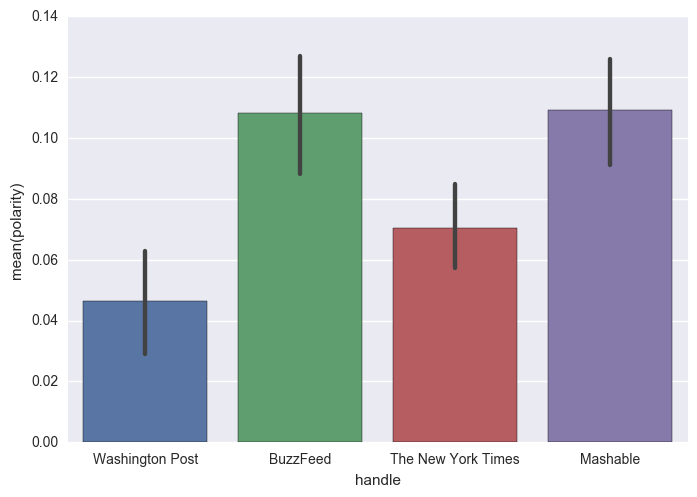

In [484]:
#looking at relationships 

sns.barplot(x = 'handle', y = 'polarity', data = tweet)
plt.show()

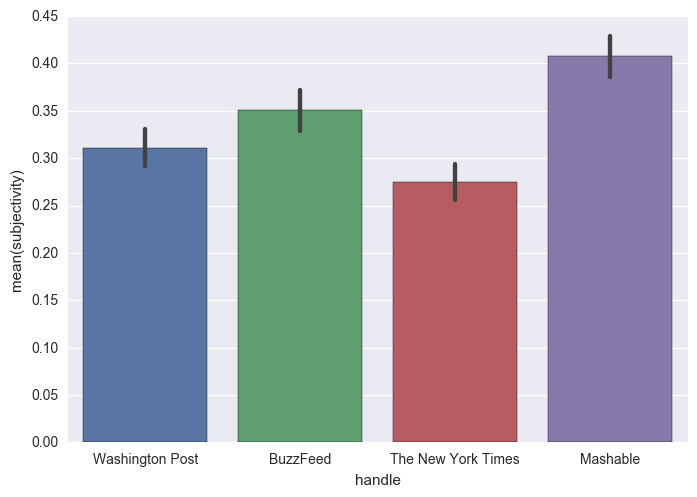

In [483]:
sns.barplot(x = 'handle', y = 'subjectivity', data = tweet)
plt.show()

In [515]:
#most_subject = tweet.sort('subjectivity', ascending = False)
#most_subject[['handle', 'text', 'retweet_count', 'subjectivity']]

In [516]:
#most_polar = tweet.sort('polarity', ascending = False)
#most_polar[['handle', 'text', 'retweet_count', 'polarity']]

In [50]:
pd.set_option('display.max_colwidth', -1)

In [703]:
#Writing functions to append columns to the dataframes indicating if the tweet was in the top half, top 75% and top 90% 
#of retweets by that organization. 

def get_quantile(df, quant1 = .5, quant2 = .75, quant3 = .9):
    return df.retweet_count.quantile(quant1), df.retweet_count.quantile(quant2),df.retweet_count.quantile(quant3), 
    

def add_quants(df):
    a,b,c = get_quantile(df)
    new_series = []
    for i in df.retweet_count:
        if i >= c:
            new_series.append([1,1,1])
        elif (i < c and i >= b):
            new_series.append([1,1,0])
        elif i > a:
            new_series.append([1,0,0])
        else:
            new_series.append([0,0,0])
    new_df = pd.DataFrame(new_series, columns = ['perc_50', 'perc_75', 'perc_90'])
    df.reset_index(inplace=True)
    dfc = pd.concat([df,new_df],axis=1)
    return dfc.drop(['index'], axis=1)

In [702]:
#wapo6 = add_quants(wapo6)
#wapo6

In [696]:
wapo6 = wapo6.drop(['perc_50', 'perc_75', 'perc_90'], axis=1)

In [ ]:
new_df = pd.DataFrame(new_series, columns = ['perc_50', 'perc_75','perc_90'])


In [631]:
#wapo5['nc'] = 
new_list = add_quants(wapo5)

new_df = pd.DataFrame(new_list, columns = ['perc_50', 'perc_75', 'perc_90'])

wapo5 = wapo5.join(new_df)


In [603]:
wapo2.retweet_count.describe()

count    2546.000000
mean      279.255302
std       511.166139
min         6.000000
25%        60.250000
50%       127.000000
75%       286.750000
max      7426.000000
Name: retweet_count, dtype: float64

In [ ]:
wapo5[['perc_50', 'perc_75', 'perc_95']] = 

In [ ]:
half, top_quarter, top_decile = retweet

In [534]:
wash2_90 = wapo2.retweet_count.quantile(.9)
wash2_75 = wapo2.retweet_count.quantile(.75)
wash2_50 = wapo2.retweet_count.quantile(.5)

nyt90 = nyt.retweet_count.quantile(.9)
nyt75 = nyt.retweet_count.quantile(.75)
nyt50 = nyt.retweet_count.quantile(.5)

buzz90 = buzz.retweet_count.quantile(.9)
buzz75 = buzz.retweet_count.quantile(.75)
buzz50 = buzz.retweet_count.quantile(.5)

masht90 = masht.retweet_count.quantile(.9)
masht75 = masht.retweet_count.quantile(.75)
masht50 = masht.retweet_count.quantile(.5)


In [214]:
buzz90 = buzz.retweet_count.quantile(.9)
buzz75 = buzz.retweet_count.quantile(.75)
buzz50 = buzz.retweet_count.quantile(.5)

In [219]:
masht50

28.5

In [213]:
nyt50

241.0

In [ ]:
class washclean():
    

In [535]:
def wc90(column):
    if column <= wash2_90:
        return 0
    else:
        return 1
def wc75(column):
    if column <= wash2_75:
        return 0
    else:
        return 1
def wc50(column):
    if column <= wash2_50:
        return 0
    else:
        return 1
def bc90(column):
    if column <= buzz90:
        return 0
    else:
        return 1
def bc75(column):
    if column <= buzz75:
        return 0
    else:
        return 1
def bc50(column):
    if column <= buzz50:
        return 0
    else:
        return 1
def nc90(column):
    if column <= nyt90:
        return 0
    else:
        return 1
def nc75(column):
    if column <= nyt75:
        return 0
    else:
        return 1
def nc50(column):
    if column <= nyt50:
        return 0
    else:
        return 1
def mc90(column):
    if column <= masht90:
        return 0
    else:
        return 1
def mc75(column):
    if column <= masht75:
        return 0
    else:
        return 1
def mc50(column):
    if column <= masht50:
        return 0
    else:
        return 1

In [ ]:
df[['hour', 'weekday', 'weeknum']]

In [536]:
wapo2['perc_90'] = wapo2['retweet_count'].apply(wc90)
wapo2['perc_75'] = wapo2['retweet_count'].apply(wc75)
wapo2['perc_50'] = wapo2['retweet_count'].apply(wc50)

In [221]:
wapo['perc_90'] = wapo['retweet_count'].apply(wc90)
wapo['perc_75'] = wapo['retweet_count'].apply(wc75)
wapo['perc_50'] = wapo['retweet_count'].apply(wc50)

nyt['perc_90'] = nyt['retweet_count'].apply(nc90)
nyt['perc_75'] = nyt['retweet_count'].apply(nc75)
nyt['perc_50'] = nyt['retweet_count'].apply(nc50)

buzz['perc_90'] = buzz['retweet_count'].apply(bc90)
buzz['perc_75'] = buzz['retweet_count'].apply(bc75)
buzz['perc_50'] = buzz['retweet_count'].apply(bc50)

masht['perc_90'] = masht['retweet_count'].apply(mc90)
masht['perc_75'] = masht['retweet_count'].apply(mc75)
masht['perc_50'] = masht['retweet_count'].apply(mc50)

In [184]:
tweet.retweet_count.describe()

count    4000.000000 
mean     286.379500  
std      980.805103  
min      1.000000    
25%      40.000000   
50%      109.000000  
75%      282.000000  
max      48227.000000
Name: retweet_count, dtype: float64

In [288]:
df_list = [masht, wapo, tweet, nyt, buzz, paper, web]

In [239]:
#converting to datetime 
for df in df_list:
    df['created_at'] = pd.to_datetime(df.created_at)

In [544]:
add_text_blob(wapo2)

In [547]:
wapo2['npstr'] = wapo2['noun_phrase'].astype('string')  

/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [543]:
from textblob import TextBlob

def add_text_blob(df):

        #df['created_at'] = pd.to_datetime(df.created_at)
        df['blob'] = df['text'].apply(lambda x: TextBlob(x))
        df['polarity'] = df['blob'].apply(lambda x: x.sentiment.polarity)
        df['subjectivity'] = df['blob'].apply(lambda x: x.sentiment.subjectivity)
        df['noun_phrase'] = df['blob'].apply(lambda x: x.noun_phrases)

In [345]:

cvt = CountVectorizer()
X_all = cvt.fit_transform(tweet["noun_phrase"])

In [343]:
tweet['noun_phrase'] = tweet['noun_phrase'].apply(lambda x: " ".join(x))


In [250]:
pd.set_option('display.max_colwidth', 40)

In [265]:
from pandas.lib import Timestamp
import datetime as dt

In [277]:
def is_weekend(column):
    if column == 'Sat':
        return 1
    elif column == 'Sun':
        return 1
    else:
        return 0 

In [278]:
for df in df_list:
    df['weekday'] = df['created_at'].apply(lambda x: x.strftime('%a'))
    df['hour'] = df['created_at'].apply(lambda x: x.strftime('%H'))
    df['is_weekend'] = df['weekday'].apply(is_weekend)

In [275]:
for df in df_list:
    list_temp = []
    for row in df['created_at']:
        list_temp.append(Timestamp(row, tz = 'UTC').tz_convert('US/Eastern'))
    df['created_at'] = list_temp

In [299]:
def row_drop(df):
    return df.drop([0,1,2])
def row_drop2(df):
    return df.drop([0,1,2,3,4])
def row_drop3(df):
    return df.drop([0,1,2,3,4,5,6,7])

In [300]:
masht = row_drop(masht)
wapo = row_drop(wapo)
nyt = row_drop(nyt)
buzz = row_drop(buzz)
paper = row_drop2(paper)
web = row_drop2(web)
tweet = row_drop3(tweet)


In [309]:
wapo_dummies = pd.get_dummies(wapo.weekday).iloc[:, 1:]

# concatenate two DataFrames (axis=0 for rows, axis=1 for columns)
wapo = pd.concat([wapo, wapo_dummies], axis=1)

In [328]:
t_dummies = pd.get_dummies(tweet.weekday).iloc[:, 1:]

# concatenate two DataFrames (axis=0 for rows, axis=1 for columns)
tweet = pd.concat([tweet, t_dummies], axis=1)

In [5]:
news['shares_num'] = news[' shares'].apply(shares)

In [22]:
news['shares_75'] = news[' shares'].apply(shares_75)

In [549]:
Xw5 = wapo[['polarity', 'subjectivity', 'hour', 'Mon', 'Sat', 'Sun', 'Thu', 'Tue', 'Wed']]
yw5 = wapo['perc_50']

Xt5 = tweet[['polarity', 'subjectivity', 'hour', 'Mon', 'Sat', 'Sun', 'Thu', 'Tue', 'Wed']]
yt5 = tweet['perc_50']

Xtt5 = tweet['text']
ytt5 = tweet['perc_50']

Xtnv5 = tweet['noun_phrase']
ytnv5 = tweet['perc_50']

Xtnv75 = tweet['noun_phrase']
ytnv75 = tweet['perc_75']

Xtnv9 = tweet['noun_phrase']
ytnv9 = tweet['perc_90']

Xwt5 = wapo2['text']
ywt5 = wapo2['perc_50']

In [23]:
X = news.drop(['url',' timedelta', ' shares', 'shares_num'], axis=1)
y = news['shares_num']


In [310]:
wapo.head(1)

,created_at,geo,handle,mined_at,place,retweet_count,text,tweet_id,perc_90,perc_75,...,time_EST,weekday,hour,is_weekend,Mon,Sat,Sun,Thu,Tue,Wed
3,2017-02-09 23:08:57-05:00,None,Washington Post,2017-02-10 00:00:05.890720,None,996,RT @adamentous: Either NSA Flynn mis...,829904965376303104,1,1,...,2017-02-09 23:08:57-05:00,Thu,23,0,0.0,0.0,0.0,1.0,0.0,0.0


In [28]:
X_75 = news.drop(['url',' timedelta', ' shares', 'shares_num', 'shares_75'], axis=1)
y_75 = news['shares_75']

In [447]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.model_selection import GridSearchCV
from time import time
from sklearn.ensemble import RandomForestClassifier
import numpy as np
from sklearn.naive_bayes import MultinomialNB, BernoulliNB
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer, TfidfVectorizer 
from sklearn.pipeline import Pipeline
from sklearn.svm import SVC
from sklearn.feature_extraction import text


In [452]:
#stop_ngram_counts_xtt5

In [453]:
my_additional_stop_words = ['https','co']
stop_words = text.ENGLISH_STOP_WORDS.union(my_additional_stop_words)

In [409]:
pipeline_lr = Pipeline([
    ('vect', CountVectorizer(ngram_range=(1,3))),
    ('tfidf', TfidfTransformer()),
    ('cls', LogisticRegression())]) 

In [454]:
pipelineBNB5 = Pipeline([
    ('vect', CountVectorizer(ngram_range=(1,3), stop_words=stop_words)),
    ('tfidf', TfidfTransformer()),
    ('cls', BernoulliNB())])

In [352]:
pipelineBNB2 = Pipeline([
    ('vect', CountVectorizer(ngram_range=(1,2))),
    ('tfidf', TfidfTransformer()),
    ('cls', BernoulliNB())]) 

In [ ]:
cvt1 = CountVectorizer(ngram_range=(1,3), stop_words = stop_words)
Xcvt = cvt1.fit_transform(Xtnv5_train)
test_xcvt = cvt1.transform(Xtnv5_test)

In [494]:
cvt2 = CountVectorizer(ngram_range=(1,3), stop_words = stop_words)
lr_xtv75train = cvt2.fit_transform(Xtnv75_train)
test_xcvt = cvt2.transform(Xtnv75_test)

In [497]:
df_lr75  = pd.DataFrame(cvt2.fit_transform(Xtnv75_train).todense(), columns=cvt2.get_feature_names())

In [495]:
model = GridSearchCV(LogisticRegression(), {'C': [0.001, 0.01, 0.1, 1.0, 10.0, 100.0],
                                            'penalty': ['l1', 'l2']})
model.fit(lr_xtv75train, ytnv75_train)
print model.best_estimator_
print model.best_params_
print model.best_score_

lr_xtv75 = model.best_estimator_

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)
{'penalty': 'l2', 'C': 1.0}
0.781597222222


In [496]:
eval_model(lr_xtv75, test_xcvt, ytnv75_test)

0.794791666667
     0   1
0  687  31
1  166  76
             precision    recall  f1-score   support

          0       0.81      0.96      0.87       718
          1       0.71      0.31      0.44       242

avg / total       0.78      0.79      0.76       960



In [ ]:
#testing pipelines

In [595]:
cvt1 = CountVectorizer(ngram_range=(1,3), stop_words = stop_words)
Xcvt = cvt1.fit_transform(Xtnv5_train)
test_xcvt = cvt1.transform(Xtnv5_test)

tfidf1 = TfidfVectorizer(ngram_range=(2,4), stop_words = stop_words)
lr_xtt5train_tfidf = tfidf1.fit_transform(Xtt5_train)
lr_xtt5test_tfidf = tfidf1.transform(Xtt5_test)


In [460]:
lr_xtt5 = LogisticRegression()
run_model(lr_xtt5, lr_xtt5train_tfidf, lr_xtt5test_tfidf, ytt5_train, ytt5_test)

0.685416666667
     0    1
0  379  102
1  200  279
             precision    recall  f1-score   support

          0       0.65      0.79      0.72       481
          1       0.73      0.58      0.65       479

avg / total       0.69      0.69      0.68       960



In [462]:
df_lr_xtt5train_tfidf  = pd.DataFrame(tfidf1.fit_transform(Xtt5_train).todense(), columns=tfidf1.get_feature_names())

In [366]:
pipelineBNB2 = Pipeline([
    ('vect', CountVectorizer(ngram_range=(1,2))),
    ('tfidf', TfidfTransformer()),
    ('cls', SVC(class_weight = 'balanced', kernel = 'linear'))
]) 
 

In [458]:
run_model(pipelineBNB3, Xtt5_train, Xtt5_test, ytt5_train, ytt5_test)

0.708333333333
     0    1
0  331  150
1  130  349
             precision    recall  f1-score   support

          0       0.72      0.69      0.70       481
          1       0.70      0.73      0.71       479

avg / total       0.71      0.71      0.71       960



In [485]:
run_model(pipeline_lr, Xtnv75_train, Xtnv75_test, ytnv75_train, ytnv75_test)

0.769791666667
     0   1
0  707  11
1  210  32
             precision    recall  f1-score   support

          0       0.77      0.98      0.86       718
          1       0.74      0.13      0.22       242

avg / total       0.76      0.77      0.70       960



In [456]:
run_model(pipelineBNB5, Xtnv5_train, Xtnv5_test, ytnv5_train, ytnv5_test)

0.713541666667
     0    1
0  370  111
1  164  315
             precision    recall  f1-score   support

          0       0.69      0.77      0.73       481
          1       0.74      0.66      0.70       479

avg / total       0.72      0.71      0.71       960



In [551]:
run_model(pipelineBNB5, Xwt5_train, Xwt5_test, ywt5_train, ywt5_test)

0.736263736264
     0    1
0  235   82
1   86  234
             precision    recall  f1-score   support

          0       0.73      0.74      0.74       317
          1       0.74      0.73      0.74       320

avg / total       0.74      0.74      0.74       637



In [331]:
w5rfc = RandomForestClassifier()
t5rfc = RandomForestClassifier()

In [332]:
run_model(t5rfc, Xt5_train, Xt5_test, yt5_train, yt5_test)

0.542708333333
     0    1
0  274  207
1  232  247
             precision    recall  f1-score   support

          0       0.54      0.57      0.56       481
          1       0.54      0.52      0.53       479

avg / total       0.54      0.54      0.54       960



In [318]:
run_model(w5rfc, Xw5_train, Xw5_test, yw5_train, yw5_test)

0.578947368421
    0   1
0  69  56
1  48  74
             precision    recall  f1-score   support

          0       0.59      0.55      0.57       125
          1       0.57      0.61      0.59       122

avg / total       0.58      0.58      0.58       247



In [327]:
def report(results, n_top=3):
    for i in range(1, n_top + 1):
        candidates = np.flatnonzero(results['rank_test_score'] == i)
        for candidate in candidates:
            print("Model with rank: {0}".format(i))
            print("Mean validation score: {0:.3f} (std: {1:.3f})".format(
                  results['mean_test_score'][candidate],
                  results['std_test_score'][candidate]))
            print("Parameters: {0}".format(results['params'][candidate]))
            print("")

# use a full grid over all parameters
param_grid = {"max_depth": [3, 6, None],
              "min_samples_split": [1, 3, 10],
              "min_samples_leaf": [1, 3, 10],
              "bootstrap": [True, False],
              "criterion": ["gini", "entropy"]}

# run grid search
grid_search = GridSearchCV(w5rfc, param_grid=param_grid)
start = time()
grid_search.fit(Xw5_train, yw5_train)

print("GridSearchCV took %.2f seconds for %d candidate parameter settings."
      % (time() - start, len(grid_search.cv_results_['params'])))
report(grid_search.cv_results_)

GridSearchCV took 15.31 seconds for 108 candidate parameter settings.
Model with rank: 1
Mean validation score: 0.562 (std: 0.018)
Parameters: {'min_samples_split': 3, 'bootstrap': False, 'criterion': 'entropy', 'max_depth': None, 'min_samples_leaf': 3}

Model with rank: 2
Mean validation score: 0.561 (std: 0.010)
Parameters: {'min_samples_split': 1, 'bootstrap': True, 'criterion': 'gini', 'max_depth': None, 'min_samples_leaf': 1}

Model with rank: 3
Mean validation score: 0.558 (std: 0.029)
Parameters: {'min_samples_split': 3, 'bootstrap': True, 'criterion': 'gini', 'max_depth': None, 'min_samples_leaf': 1}

Model with rank: 3
Mean validation score: 0.558 (std: 0.016)
Parameters: {'min_samples_split': 10, 'bootstrap': True, 'criterion': 'gini', 'max_depth': None, 'min_samples_leaf': 1}



In [550]:
X_train, X_test, y_train, y_test = train_test_split(X,y, train_size = .75, random_state = 10)
X_train75, X_test75, y_train75, y_test75 = train_test_split(X_75,y_75, train_size = .75, random_state = 10)
Xw5_train, Xw5_test, yw5_train, yw5_test = train_test_split(Xw5,yw5, train_size = .75, random_state = 10)
Xt5_train, Xt5_test, yt5_train, yt5_test = train_test_split(Xt5,yt5, train_size = .75, random_state = 10)
Xtt5_train, Xtt5_test, ytt5_train, ytt5_test = train_test_split(Xtt5,ytt5, train_size = .75, random_state = 10)
Xtnv5_train, Xtnv5_test, ytnv5_train, ytnv5_test = train_test_split(Xtnv5,ytnv5, train_size = .75, random_state = 10)
Xtnv75_train, Xtnv75_test, ytnv75_train, ytnv75_test = train_test_split(Xtnv75,ytnv75, train_size = .75, random_state = 10)
Xtnv9_train, Xtnv9_test, ytnv9_train, ytnv9_test = train_test_split(Xtnv9,ytnv9, train_size = .75, random_state = 10)
Xwt5_train, Xwt5_test, ywt5_train, ywt5_test = train_test_split(Xwt5,ywt5, train_size = .75, random_state = 10)



In [305]:
def run_model(model, x_train, x_test, y_train, y_test):
    model.fit(x_train, y_train)
    y_preds = model.predict(x_test)
    conmat_1 = confusion_matrix(y_test, y_preds, labels=model.classes_)
    conmat_1 = pd.DataFrame(conmat_1, columns=model.classes_, index=model.classes_)
    print(accuracy_score(y_test,y_preds))
    print(conmat_1)
    print(classification_report(y_test,y_preds))
    #return (accuracy_score(y_test,y_preds), (conmat_1), classification_report(y_test,y_preds))
    
    
def eval_model(model, x_test, y_true):
    y_pred = model.predict(x_test)
    conmat_1 = confusion_matrix(y_true, y_pred, labels=model.classes_)
    conmat_1 = pd.DataFrame(conmat_1, columns=model.classes_, index=model.classes_)
    print(accuracy_score(y_true,y_pred))
    print(conmat_1)
    print(classification_report(y_true,y_pred ))
    
    
def log_get_co(model, X):
    coeffs = pd.DataFrame(model.coef_, columns = X.columns)
    coeffs = coeffs.transpose()
    coeffs.columns = ['Coefficient']
    coeffs_t = pd.DataFrame(model.coef_, columns = X.columns)
    coeffs_t = coeffs_t.transpose()
    coeffs_t.columns = ['Abs_Coefficient']
    cos = pd.concat([coeffs, coeffs_t], axis=1)
    cos['Abs_Coefficient'] = cos['Abs_Coefficient'].abs()
    return cos.sort_values('Abs_Coefficient', ascending=False)

In [38]:
news.shape

(39644, 62)

In [34]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV


In [37]:
glr = GridSearchCV(LogisticRegression(), {'C': [0.001, 0.01, 0.1, 1.0, 10.0, 100.0],
                                            'penalty': ['l1', 'l2']})
glr.fit(X_train75, y_train75)
print glr.best_estimator_
print glr.best_params_
print glr.best_score_

LogisticRegression(C=100.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l1', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)
{'penalty': 'l1', 'C': 100.0}
0.760972656644


In [40]:
glr = glr.best_estimator_

In [41]:
eval_model(glr, X_test75, y_test75)

0.754515185148
      0    1
0  7278  196
1  2237  200
             precision    recall  f1-score   support

          0       0.76      0.97      0.86      7474
          1       0.51      0.08      0.14      2437

avg / total       0.70      0.75      0.68      9911



In [48]:
glr.decision_function(X_test75)

array([-1.47816431, -1.99433654, -0.90825052, ..., -0.98932808,
       -1.67669293, -0.38259846])

In [49]:
glr.predict_proba(X_test75)

array([[ 0.81429515,  0.18570485],
       [ 0.88020117,  0.11979883],
       [ 0.71264203,  0.28735797],
       ..., 
       [ 0.72895519,  0.27104481],
       [ 0.84246612,  0.15753388],
       [ 0.59449967,  0.40550033]])

In [377]:
pipelineBNB2.fit(Xtnv5_train, ytnv5_train)
ytnv5_pred = pipelineBNB2.predict_proba(Xtnv5_test)

In [383]:
ytnv5_pred_viral = []
for i in ytnv5_pred:
    ytnv5_pred_viral.append(i[1])



In [398]:
manual_pred_viral = []
for i in manual_preds:
    manual_pred_viral.append(i[1])

In [413]:
bnb = BernoulliNB()
lr = LogisticRegression()
lrnp = LogisticRegression()

In [587]:
eval_model(bnb, test_xcvt, ytnv5_test)

ValueError: Expected input with 26232 features, got 20307 instead

In [414]:
bnb.fit(Xcvt, ytnv5_train)
lr.fit(Xcvt, ytnv5_train)
lr.fit(Xcvt, ytnv5_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [594]:
#manual_preds = bnb.predict_proba(test_xcvt)

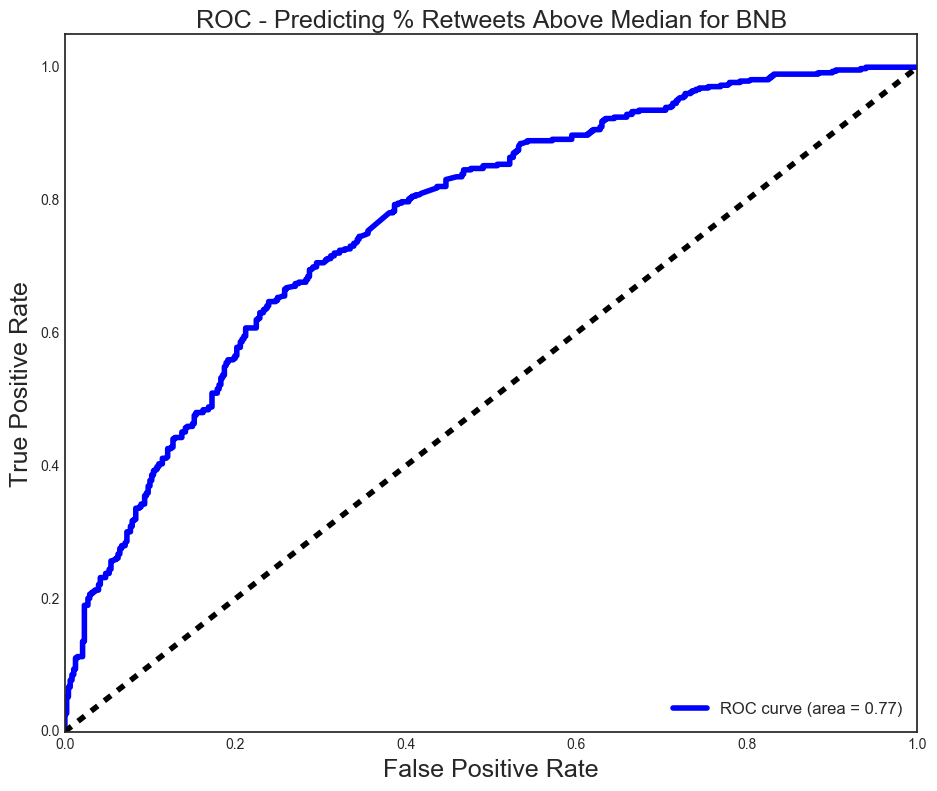

In [385]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
plt.style.use('seaborn-white')
%matplotlib inline



#Y_score75 = glr.predict_proba(X_test75)

FPR = dict()
TPR = dict()
ROC_AUC = dict()

# For class 1, find the area under the curve
FPR[1], TPR[1], _ = roc_curve(ytnv5_test, ytnv5_pred_viral)
ROC_AUC[1] = auc(FPR[1], TPR[1])

# Plot of a ROC curve for class 1 (has_cancer)
plt.figure(figsize=[11,9])
plt.plot(FPR[1], TPR[1], label='ROC curve (area = %0.2f)' % ROC_AUC[1], linewidth=4)
plt.plot([0, 1], [0, 1], 'k--', linewidth=4)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate', fontsize=18)
plt.ylabel('True Positive Rate', fontsize=18)
plt.title('ROC - Predicting % Retweets Above Median for BNB', fontsize=18)
plt.legend(loc="lower right")
plt.show()

In [380]:
Y_score75


array([-1.47816431, -1.99433654, -0.90825052, ..., -0.98932808,
       -1.67669293, -0.38259846])

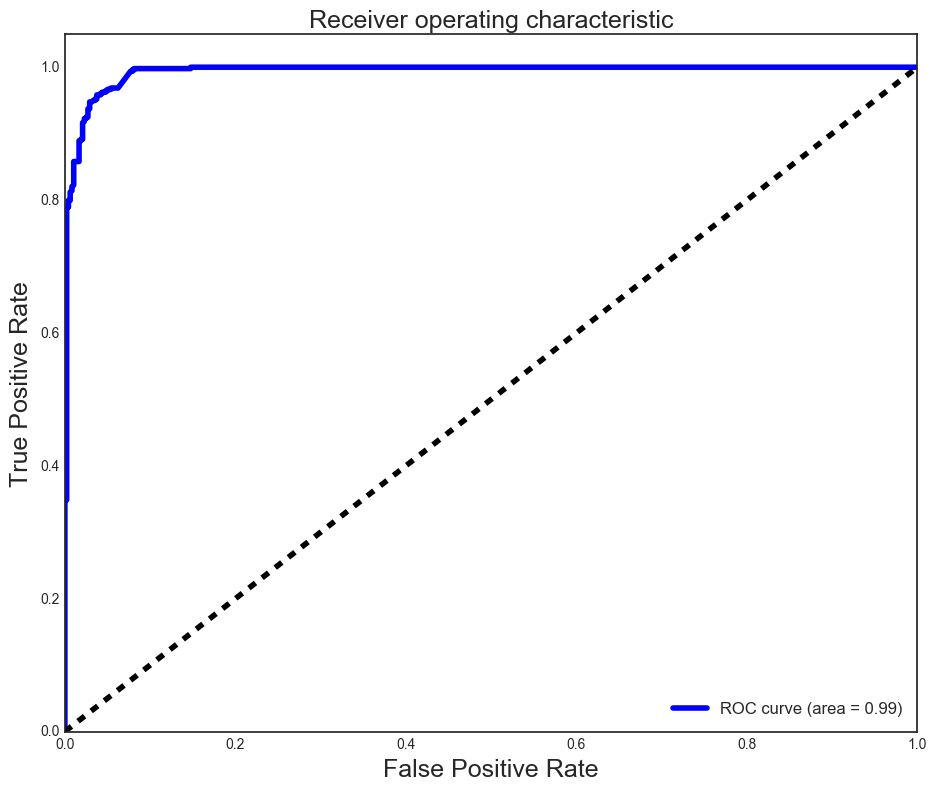

In [399]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
plt.style.use('seaborn-white')
%matplotlib inline



#Y_score75 = glr.decision_function(X_test75)

FPR = dict()
TPR = dict()
ROC_AUC = dict()

# For class 1, find the area under the curve
FPR[0], TPR[0], _ = roc_curve(ytnv75_test, manual_pred_viral)
ROC_AUC[0] = auc(FPR[0], TPR[0])

# Plot of a ROC curve for class 1 (has_cancer)
plt.figure(figsize=[11,9])
plt.plot(FPR[0], TPR[0], label='ROC curve (area = %0.2f)' % ROC_AUC[0], linewidth=4)
plt.plot([0, 1], [0, 1], 'k--', linewidth=4)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate', fontsize=18)
plt.ylabel('True Positive Rate', fontsize=18)
plt.title('Receiver operating characteristic', fontsize=18)
plt.legend(loc="lower right")
plt.show()

In [47]:
FPR

{0: array([  0.00000000e+00,   0.00000000e+00,   1.33797164e-04, ...,
          9.94915708e-01,   9.94915708e-01,   1.00000000e+00])}

In [592]:
#lr_features_df.head(10)

In [449]:
stop_ngram_counts_xtt5 = []
for header in list(df_lr_xtt5train_tfidf):
    value = df_lr_xtt5train_tfidf[header].sum()
    stop_ngram_counts_xtt5.append((header,value))
    
stop_ngram_counts_xtt5.sort(key=lambda x: x[1], reverse = True)

In [513]:
#looking at coefficients 
log_get_co(lr_xtt5, df_lr_xtt5train_tfidf)

,Coefficient,Abs_Coefficient
super bowl,-1.620494,1.620494
president trump,1.468844,1.468844
betsy devos,1.071761,1.071761
white house,1.045665,1.045665
elizabeth warren,1.038466,1.038466
sean spicer,1.024790,1.024790
trump travel,0.977986,0.977986
kellyanne conway,0.956182,0.956182
trump travel ban,0.928986,0.928986
need know,-0.924660,0.924660


In [467]:
lrtt_features_df = log_get_co(lr_xtt5, df_lr_xtt5train_tfidf)
lrtt_topfeatures_df = lrtt_features_df[lrtt_features_df.Abs_Coefficient >=.6]


In [502]:
#log_get_co(lr_xtv75, df_lr75)

In [503]:
lr_xtv75_features = log_get_co(lr_xtv75, df_lr75)
lr_xtv75_topfeatures = lr_xtv75_features[lr_xtv75_features.Abs_Coefficient >=.9]

In [504]:
lr_xtv75_topfeatures.to_csv('/Users/davidbeightol/Documents/DSI/data_sets/lrtt75_topfeatures.csv')

In [468]:
lrtt_topfeatures_df.to_csv('/Users/davidbeightol/Documents/DSI/data_sets/lrtt_topfeatures.csv')

In [438]:
lr_topfeatures_df = lr_features_df[lr_features_df.Abs_Coefficient >=.75]

In [417]:
log_get_co(glr, X_train75)

In [15]:
lr = LogisticRegression(penalty='l2')

In [16]:
#lr.feature_importances_

In [17]:

import matplotlib
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn import linear_model, decomposition, datasets
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV

logistic = linear_model.LogisticRegression()

pca = decomposition.PCA()
pipe = Pipeline(steps=[('pca', pca), ('logistic', logistic)])

X_digits = X_train
y_digits = y_train

In [10]:
rfc = RandomForestClassifier(criterion = 'entropy')

In [27]:
#rfc.feature_importances_

In [28]:
from sklearn.feature_selection import SelectFromModel

In [29]:
rfc_reduced = SelectFromModel(rfc, prefit=True)

In [32]:
X_train_new = rfc_reduced.transform(X_train)

In [33]:
X_test_new = rfc_reduced.transform(X_test)

In [30]:
run_model(rfc, X_train75, X_test75, y_train75, y_test75)

0.747149631722
      0    1
0  7081  393
1  2113  324
             precision    recall  f1-score   support

          0       0.77      0.95      0.85      7474
          1       0.45      0.13      0.21      2437

avg / total       0.69      0.75      0.69      9911



In [16]:
def tree_get_co(model, X):
    cos = pd.DataFrame(model.feature_importances_, index = X.columns, columns = ['Coefficient'])
    return cos.sort_values('Coefficient', ascending=False)


In [333]:
tree_get_co(t5rfc, Xt5)

,Coefficient
hour,0.332492
subjectivity,0.293869
polarity,0.288094
Sun,0.021225
Mon,0.017355
Thu,0.014343
Sat,0.012105
Wed,0.010440
Tue,0.010078


In [ ]:
#news.to_csv('../../../../mashable.csv', index=False)